## Data Loading, Understanding and Insights

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\AI-Powered-Career-Recommendation-System\\Data\\AI-based Career Recommendation System.csv")

In [5]:
df.head()

,CandidateID,Name,Age,Education,Skills,Interests,Recommended_Career,Recommendation_Score
0,1,John Doe,28,Bachelor's,Python;Data Analysis;Machine Learning,Technology;Data Science,Data Scientist,0.95
1,2,Jane Smith,32,Master's,Java;System Design;Cloud Computing,Software Development;AI,Software Engineer,0.90
2,3,Bob Johnson,24,Bachelor's,Graphic Design;UI/UX;Adobe Creative Suite,Arts;Digital Media,UX Designer,0.88
3,4,Emily Davis,26,Bachelor's,Python;Deep Learning;Statistics,Healthcare;AI,AI Researcher,0.93
4,5,Michael Brown,30,Master's,Project Management;Communication;Agile,Business;Management,Project Manager,0.87


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CandidateID           200 non-null    int64  
 1   Name                  200 non-null    object 
 2   Age                   200 non-null    int64  
 3   Education             200 non-null    object 
 4   Skills                200 non-null    object 
 5   Interests             200 non-null    object 
 6   Recommended_Career    200 non-null    object 
 7   Recommendation_Score  200 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 12.6+ KB


In [21]:
df.shape

(200, 8)

In [23]:
df.isnull().sum()

CandidateID             0
Name                    0
Age                     0
Education               0
Skills                  0
Interests               0
Recommended_Career      0
Recommendation_Score    0
dtype: int64

In [25]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

## Data Preprocessing and Feature Engineering (Simulated Feature Scores)

In [27]:
df['Skills'] = df['Skills'].str.replace('\n', '').str.strip()
df['Interests'] = df['Interests'].str.replace('\n', '').str.strip()


In [29]:
df['Skills'] = df['Skills'].str.lower()
df['Interests'] = df['Interests'].str.lower()


In [31]:
df.drop(['CandidateID', 'Age'], axis=1, inplace=True)

In [33]:
def get_programming_score(skills):
    if any(skill in skills for skill in ['python', 'java', 'c++', 'programming', 'software', 'coding']):
        return np.random.randint(8, 10)
    elif any(skill in skills for skill in ['html', 'css', 'ui/ux', 'design', 'javascript']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)

In [35]:
def get_logical_thinking_score(skills, interests):
    keywords = ['data analysis', 'ml', 'machine learning', 'deep learning', 'analytics', 'problem solving']
    if any(k in skills for k in keywords) or any(k in interests for k in keywords):
        return np.random.randint(8, 10)
    elif any(k in skills for k in ['design', 'project', 'ui/ux']) or any(k in interests for k in ['business', 'marketing']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)


In [37]:
def get_math_score(skills, interests):
    keywords = ['statistics', 'machine learning', 'mathematics', 'data science', 'algebra']
    if any(k in skills for k in keywords) or any(k in interests for k in keywords):
        return np.random.randint(8, 10)
    elif any(k in skills for k in ['html', 'css', 'cloud']) or any(k in interests for k in ['management']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)

In [39]:
def get_problem_solving_score(skills, interests):
    keywords = ['problem solving', 'ml', 'ai', 'analytics', 'debugging']
    if any(k in skills for k in keywords) or any(k in interests for k in keywords):
        return np.random.randint(8, 10)
    elif any(k in skills for k in ['python', 'cloud', 'software']) or any(k in interests for k in ['technology']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)

In [41]:
df['programming_skills'] = df['Skills'].apply(get_programming_score)
df['logical_thinking'] = df.apply(lambda row: get_logical_thinking_score(row['Skills'], row['Interests']), axis=1)
df['math_score'] = df.apply(lambda row: get_math_score(row['Skills'], row['Interests']), axis=1)
df['problem_solving'] = df.apply(lambda row: get_problem_solving_score(row['Skills'], row['Interests']), axis=1)

In [43]:
df.head()

,Name,Education,Skills,Interests,Recommended_Career,Recommendation_Score,programming_skills,logical_thinking,math_score,problem_solving
0,John Doe,Bachelor's,python;data analysis;machine learning,technology;data science,Data Scientist,0.95,9,9,8,6
1,Jane Smith,Master's,java;system design;cloud computing,software development;ai,Software Engineer,0.90,9,5,6,9
2,Bob Johnson,Bachelor's,graphic design;ui/ux;adobe creative suite,arts;digital media,UX Designer,0.88,5,6,3,2
3,Emily Davis,Bachelor's,python;deep learning;statistics,healthcare;ai,AI Researcher,0.93,9,9,8,8
4,Michael Brown,Master's,project management;communication;agile,business;management,Project Manager,0.87,3,6,5,2


In [45]:
df[['Education', 'Skills', 'Interests', 'programming_skills', 'logical_thinking', 'math_score', 'problem_solving']].head(15)


,Education,Skills,Interests,programming_skills,logical_thinking,math_score,problem_solving
0,Bachelor's,python;data analysis;machine learning,technology;data science,9,9,8,6
1,Master's,java;system design;cloud computing,software development;ai,9,5,6,9
2,Bachelor's,graphic design;ui/ux;adobe creative suite,arts;digital media,5,6,3,2
3,Bachelor's,python;deep learning;statistics,healthcare;ai,9,9,8,8
4,Master's,project management;communication;agile,business;management,3,6,5,2
5,Bachelor's,c++;embedded systems;iot,electronics;automation,9,2,2,2
6,Master's,sql;data warehousing;etl,finance;analytics,3,9,3,9
7,Bachelor's,content writing;seo;social media,marketing;communications,3,6,2,2
8,Bachelor's,python;natural language processing;machine lea...,linguistics;technology,9,8,9,5
9,Master's,financial analysis;excel;econometrics,finance;data analysis,3,9,2,3


## Exploratory Data Analysis (EDA)
1. Career Recommendation Frequency
2. Distribution of Simulated Features Scores
3. Correlation Heatmap

In [60]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8104\4081658392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Recommended_Career', order=df['Recommended_Career'].value_counts().index, palette='viridis')


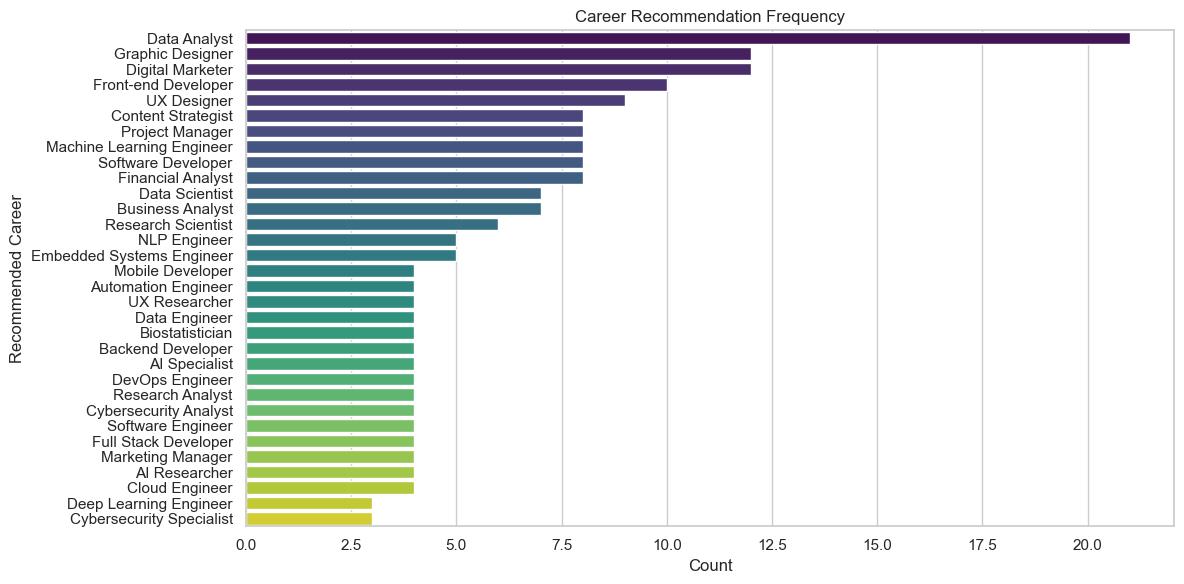

In [62]:
# 1. Distribution of Recommended Careers
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Recommended_Career', order=df['Recommended_Career'].value_counts().index, palette='viridis')
plt.title("Career Recommendation Frequency")
plt.xlabel("Count")
plt.ylabel("Recommended Career")
plt.tight_layout()
plt.show()

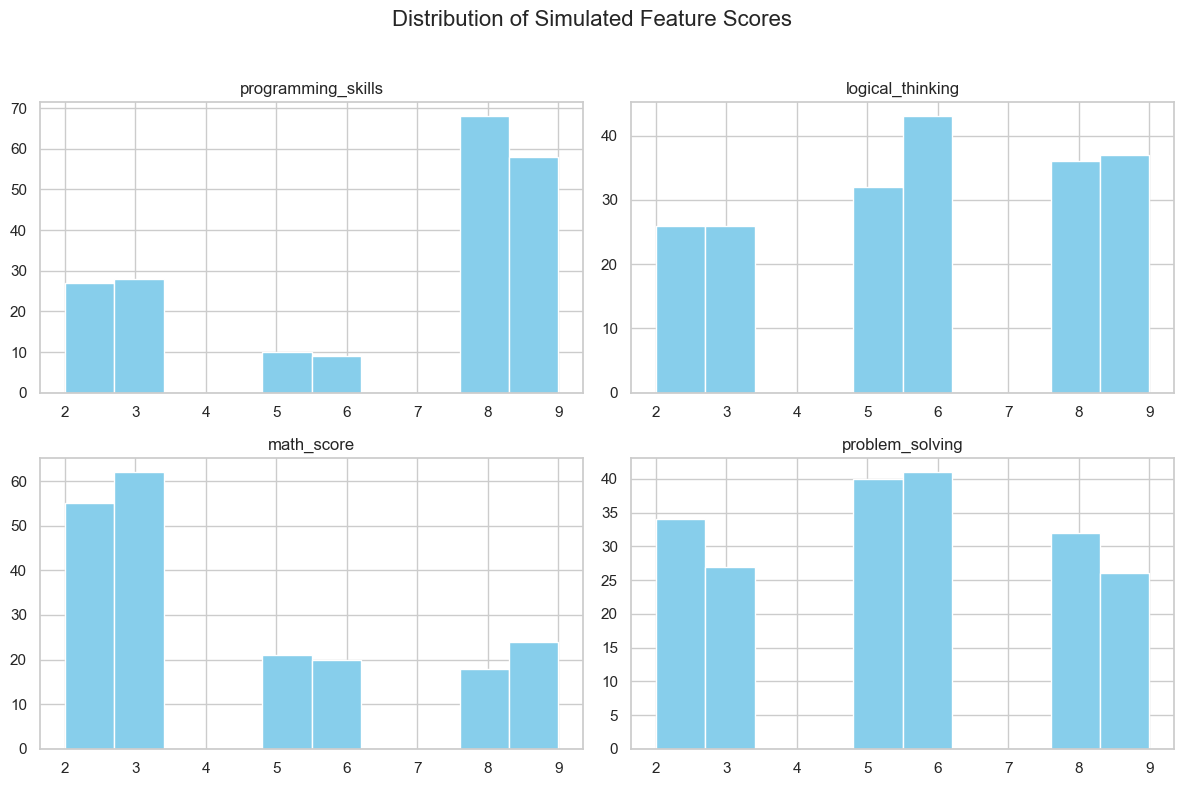

In [50]:
# 2. Histogram of simulated scores
score_columns = ['programming_skills', 'logical_thinking', 'math_score', 'problem_solving']
df[score_columns].hist(bins=10, figsize=(12, 8), layout=(2, 2), color='skyblue')
plt.suptitle("Distribution of Simulated Feature Scores", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


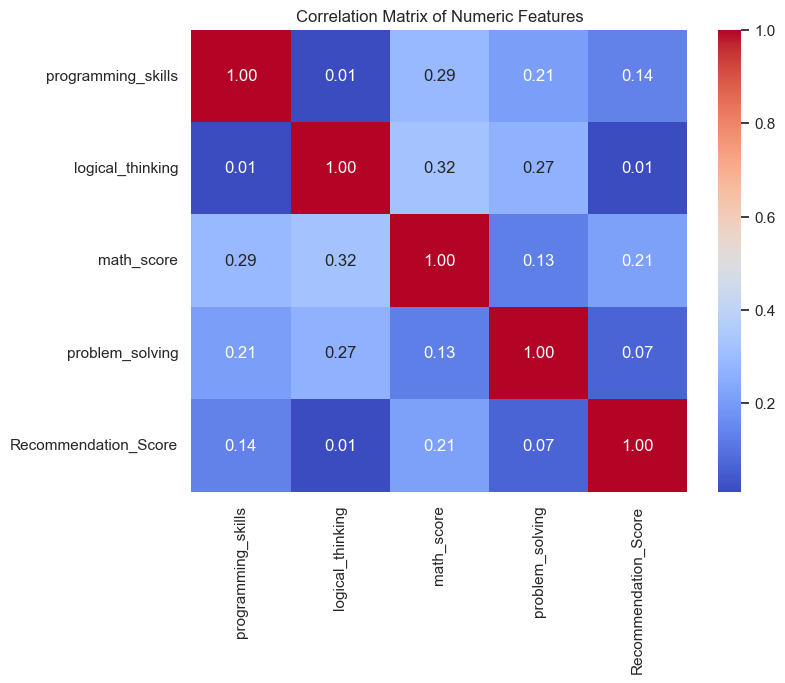

In [51]:

# 3. Correlation heatmap
numeric_features = df[score_columns + ['Recommendation_Score']]
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [55]:
df.head()

,Name,Education,Skills,Interests,Recommended_Career,Recommendation_Score,programming_skills,logical_thinking,math_score,problem_solving
0,John Doe,Bachelor's,python;data analysis;machine learning,technology;data science,Data Scientist,0.95,9,9,8,6
1,Jane Smith,Master's,java;system design;cloud computing,software development;ai,Software Engineer,0.90,9,5,6,9
2,Bob Johnson,Bachelor's,graphic design;ui/ux;adobe creative suite,arts;digital media,UX Designer,0.88,5,6,3,2
3,Emily Davis,Bachelor's,python;deep learning;statistics,healthcare;ai,AI Researcher,0.93,9,9,8,8
4,Michael Brown,Master's,project management;communication;agile,business;management,Project Manager,0.87,3,6,5,2


## Preparing Data for Mode Training

In [68]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1: Clean and prepare Skills and Interests
df['Skills'] = df['Skills'].str.lower().str.split(';')
df['Interests'] = df['Interests'].str.lower().str.split(';')

# Step 2: Multi-label binarization for Skills and Interests
mlb_skills = MultiLabelBinarizer()
skills_encoded = pd.DataFrame(mlb_skills.fit_transform(df['Skills']), columns=[f"skill_{s}" for s in mlb_skills.classes_])

mlb_interests = MultiLabelBinarizer()
interests_encoded = pd.DataFrame(mlb_interests.fit_transform(df['Interests']), columns=[f"interest_{i}" for i in mlb_interests.classes_])

# Step 3: Combine all feature columns
numerical_features = df[['programming_skills', 'logical_thinking', 'math_score', 'problem_solving']]
X = pd.concat([numerical_features, skills_encoded, interests_encoded], axis=1)

# Step 4: Encode target variable
le = LabelEncoder()
y = le.fit_transform(df['Recommended_Career'])

# Optional: Store mapping for later interpretation
career_labels = dict(zip(le.classes_, le.transform(le.classes_)))

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show result summary
print(f"Total Samples: {df.shape[0]}")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")
print(f"Input Feature Shape: {X.shape}")

Total Samples: 200
Training Samples: 160
Testing Samples: 40
Input Feature Shape: (200, 122)


## Model Selection, Training & Evaluation


 Training and Evaluating: Logistic Regression
 Accuracy: 0.50
 Classification Report:
                           precision    recall  f1-score   support

      Automation Engineer       0.50      1.00      0.67         1
        Backend Developer       0.00      0.00      0.00         1
          Biostatistician       0.00      0.00      0.00         2
         Business Analyst       1.00      0.50      0.67         2
           Cloud Engineer       0.00      0.00      0.00         1
       Content Strategist       0.00      0.00      0.00         1
    Cybersecurity Analyst       1.00      0.33      0.50         3
             Data Analyst       0.50      0.50      0.50         4
           Data Scientist       1.00      0.50      0.67         2
   Deep Learning Engineer       0.00      0.00      0.00         1
         Digital Marketer       1.00      0.60      0.75         5
Embedded Systems Engineer       0.50      1.00      0.67         1
        Financial Analyst       1.00     

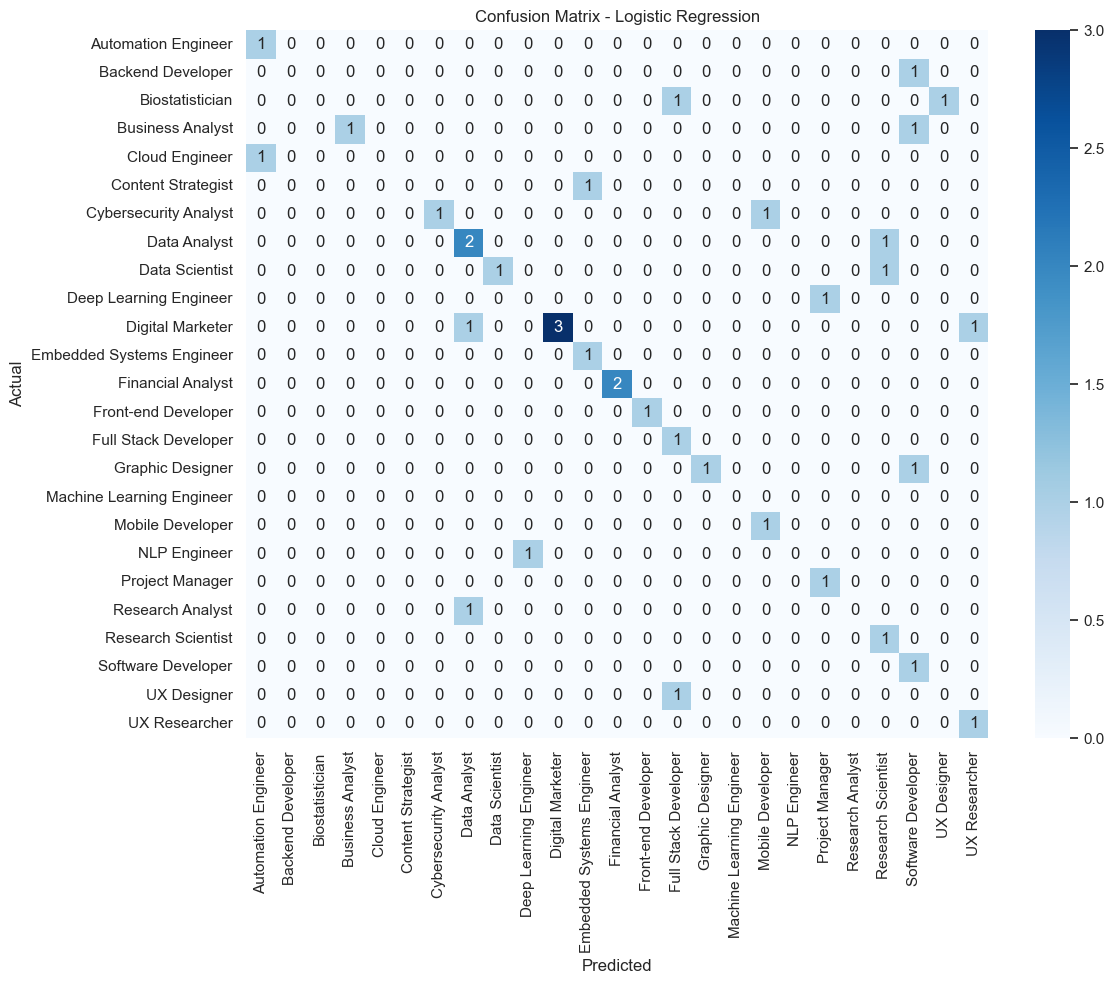


 Training and Evaluating: Random Forest
 Accuracy: 0.50
 Classification Report:
                           precision    recall  f1-score   support

      Automation Engineer       0.50      1.00      0.67         1
        Backend Developer       0.50      1.00      0.67         1
          Biostatistician       0.00      0.00      0.00         2
         Business Analyst       1.00      0.50      0.67         2
           Cloud Engineer       0.00      0.00      0.00         1
       Content Strategist       0.00      0.00      0.00         1
    Cybersecurity Analyst       1.00      0.33      0.50         3
             Data Analyst       1.00      0.25      0.40         4
           Data Scientist       0.50      0.50      0.50         2
   Deep Learning Engineer       0.00      0.00      0.00         1
         Digital Marketer       0.75      0.60      0.67         5
Embedded Systems Engineer       0.50      1.00      0.67         1
        Financial Analyst       1.00      1.00 

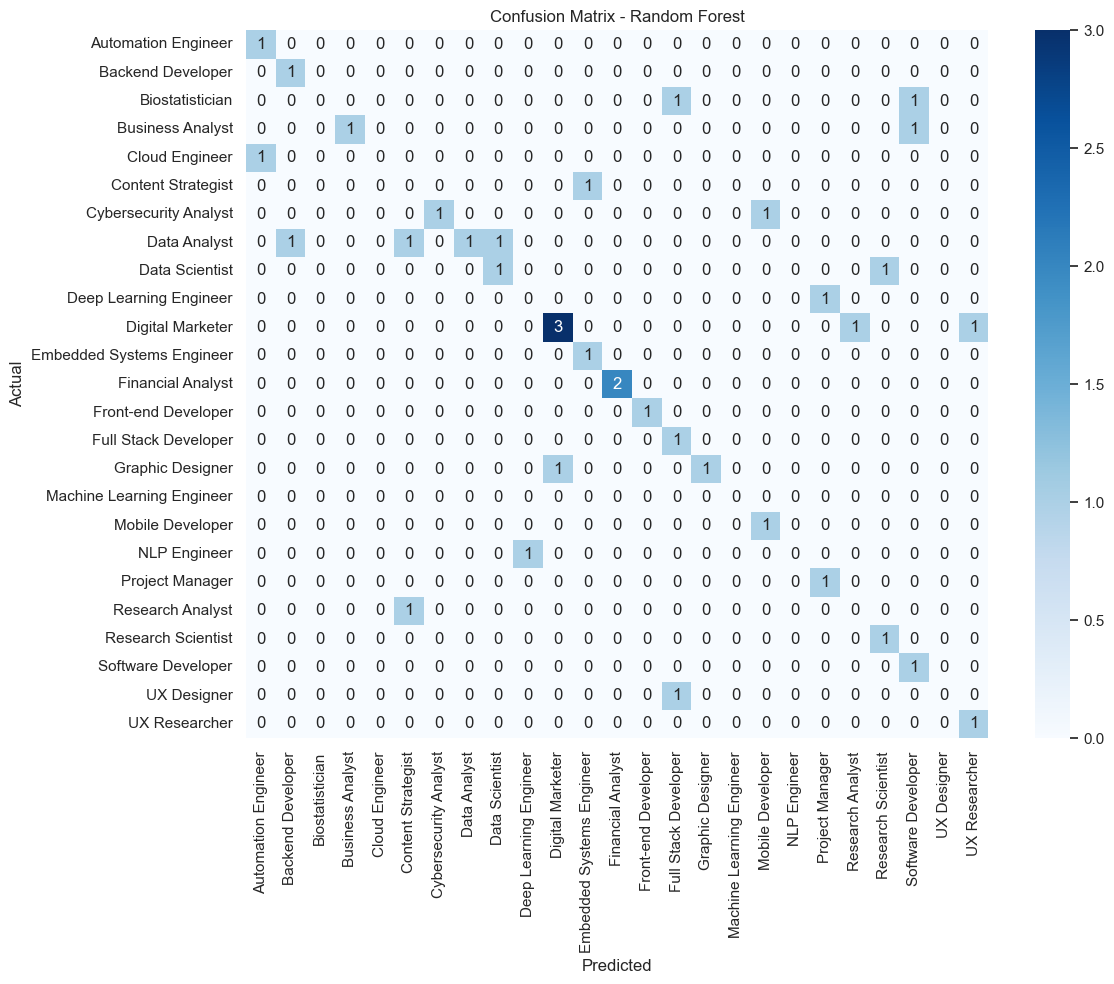


 Training and Evaluating: Naive Bayes
 Accuracy: 0.15
 Classification Report:
                           precision    recall  f1-score   support

      Automation Engineer       0.00      0.00      0.00         1
        Backend Developer       0.00      0.00      0.00         1
          Biostatistician       0.00      0.00      0.00         2
         Business Analyst       0.00      0.00      0.00         2
           Cloud Engineer       0.00      0.00      0.00         1
       Content Strategist       0.00      0.00      0.00         1
    Cybersecurity Analyst       0.00      0.00      0.00         3
             Data Analyst       0.10      0.75      0.18         4
           Data Scientist       0.00      0.00      0.00         2
   Deep Learning Engineer       0.00      0.00      0.00         1
         Digital Marketer       0.00      0.00      0.00         5
Embedded Systems Engineer       0.00      0.00      0.00         1
        Financial Analyst       0.00      0.00   

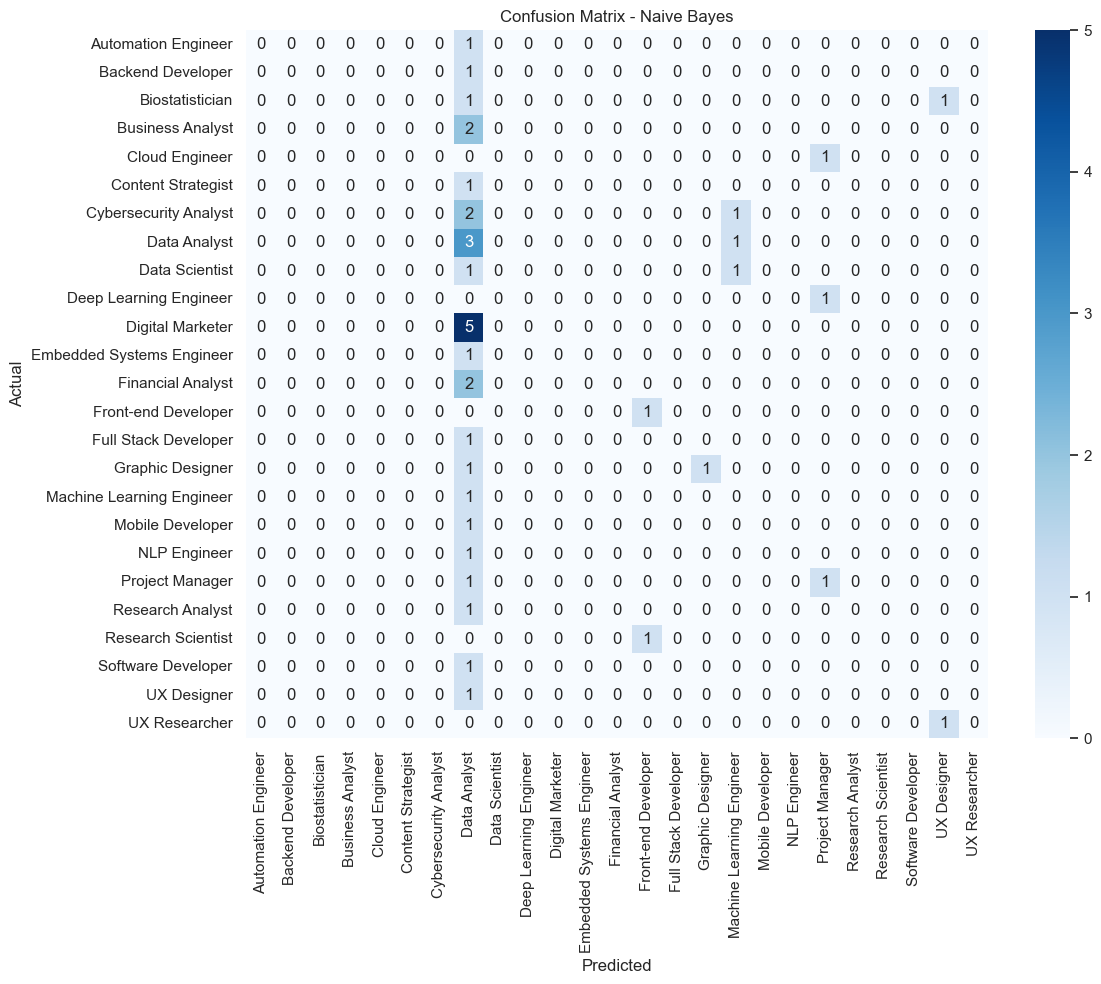


 Training and Evaluating: K-Nearest Neighbors
 Accuracy: 0.17
 Classification Report:
                           precision    recall  f1-score   support

      Automation Engineer       0.00      0.00      0.00         1
        Backend Developer       0.00      0.00      0.00         1
          Biostatistician       0.00      0.00      0.00         2
         Business Analyst       0.17      0.50      0.25         2
           Cloud Engineer       0.00      0.00      0.00         1
       Content Strategist       0.00      0.00      0.00         1
    Cybersecurity Analyst       0.00      0.00      0.00         3
             Data Analyst       0.00      0.00      0.00         4
           Data Scientist       0.00      0.00      0.00         2
   Deep Learning Engineer       0.00      0.00      0.00         1
         Digital Marketer       0.00      0.00      0.00         5
Embedded Systems Engineer       0.33      1.00      0.50         1
        Financial Analyst       0.00     

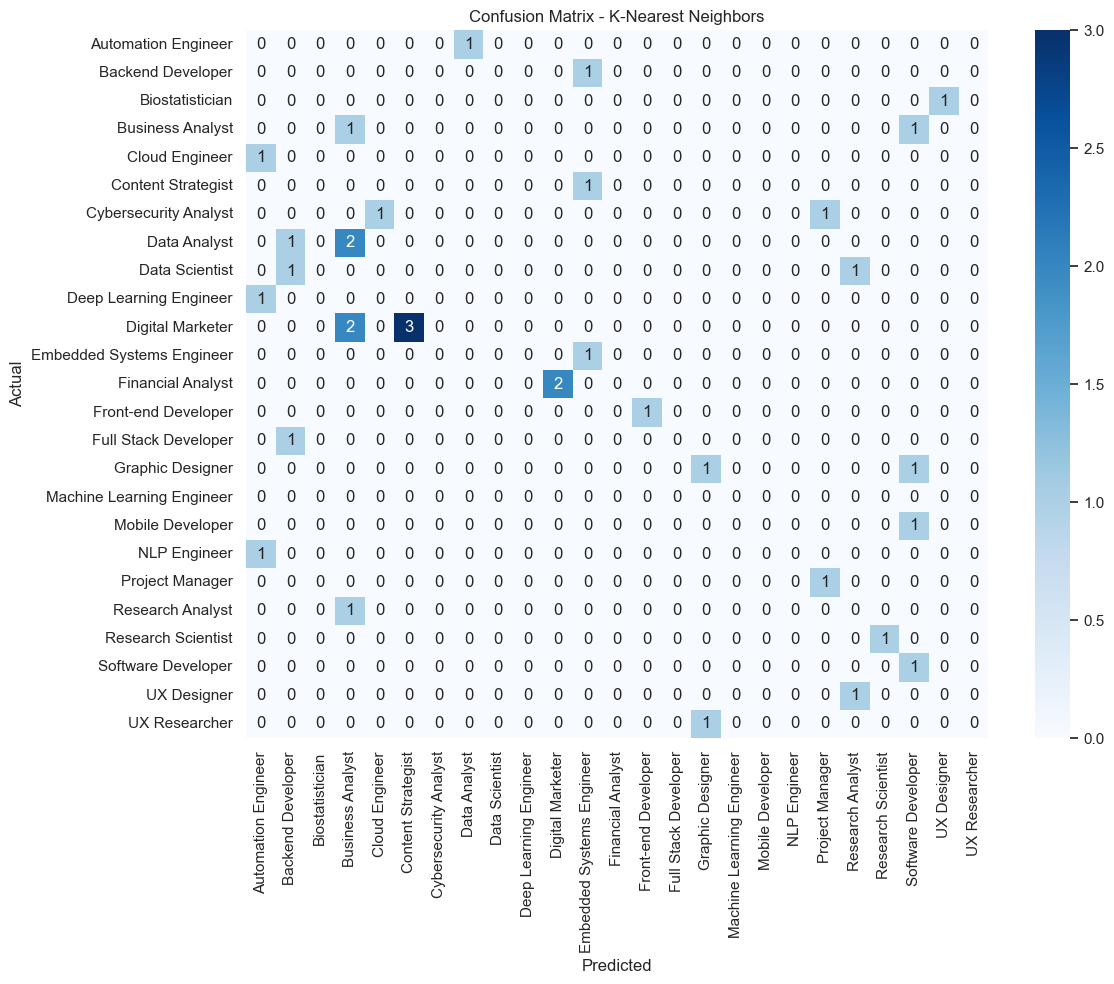


 Best Performing Model: Logistic Regression with Accuracy = 0.50


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# List of models to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial'),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store results
results = {}

# Variable to store best model instance
best_model_instance = None
best_model_name = None

for name, model in models.items():
    print(f"\n Training and Evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    # Update best model
    if best_model_instance is None or acc > results.get(best_model_name, 0):
        best_model_name = name
        best_model_instance = model

    print(f" Accuracy: {acc:.2f}")

    # Get only the labels actually present in y_test
    labels_present = np.unique(y_test)
    target_names_present = le.inverse_transform(labels_present)

    print(" Classification Report:")
    print(classification_report(
        y_test, y_pred,
        labels=labels_present,
        target_names=target_names_present,
        zero_division=0
    ))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels_present)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names_present, yticklabels=target_names_present)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Final best model info
print(f"\n Best Performing Model: {best_model_name} with Accuracy = {results[best_model_name]:.2f}")


## Saving the Best Model (Logistic Regression) & Label Encoder 

In [133]:
df['Input'] = df['Skills'].astype(str) + " " + df['Interests'].astype(str)


In [135]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Input'])
y = le.fit_transform(df['Recommended_Career'])


In [9]:
import joblib

In [141]:
# Step: Save the best model (Logistic Regression)
joblib.dump(models["Logistic Regression"], 'career_prediction_model.pkl')

# Step: Save the TF-IDF Vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Step: Save the Label Encoder
joblib.dump(le, 'label_encoder.pkl')

print(" Model, Vectorizer, and Label Encoder saved successfully!")

 Model, Vectorizer, and Label Encoder saved successfully!


## Testing the Saved Model with New Inputs

In [21]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

# 2. Load your dataset
df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\AI-Powered-Career-Recommendation-System\\Data\\AI-based Career Recommendation System.csv")  

# 3. Fill missing values just in case
df['Skills'] = df['Skills'].fillna('')
df['Interests'] = df['Interests'].fillna('')
df['Recommended_Career'] = df['Recommended_Career'].fillna('')

# 4. Combine Skills and Interests into one feature
df['Combined'] = (df['Skills'] + ' ' + df['Interests']).str.lower()

# 5. Encode the target labels
label_encoder = LabelEncoder()
df['Career_Label'] = label_encoder.fit_transform(df['Recommended_Career'])

# 6. TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Combined'])
y = df['Career_Label']

# 7. Split the data (optional, for evaluation purposes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 9. Save the model, vectorizer, and label encoder
joblib.dump(model, "career_model.pkl")
joblib.dump(vectorizer, "career_vectorizer.pkl")
joblib.dump(label_encoder, "career_label_encoder.pkl")

print("✅ Model, vectorizer, and label encoder saved successfully.")


✅ Model, vectorizer, and label encoder saved successfully.


In [27]:
# Load saved components
model = joblib.load("career_model.pkl")
vectorizer = joblib.load("career_vectorizer.pkl")
label_encoder = joblib.load("career_label_encoder.pkl")

# Prediction function
def predict_top_careers(skills, interests, model, vectorizer, label_encoder, top_n=5):
    # Preprocess inputs
    skills_clean = skills.strip().lower()
    interests_clean = interests.strip().lower()
    input_text = skills_clean + " " + interests_clean
    input_vector = vectorizer.transform([input_text])

    # Predict probabilities
    probs = model.predict_proba(input_vector)[0]
    top_indices = probs.argsort()[-top_n:][::-1]
    
    # Map back to career names and their probabilities
    top_careers = [(label_encoder.inverse_transform([i])[0], round(probs[i]*100, 2)) for i in top_indices]
    return top_careers


In [82]:
sample_skills = "Python; Deep Learning; Statistics"
sample_interests = "AI; Healthcare"

top_careers = predict_top_careers(sample_skills, sample_interests, model, vectorizer, label_encoder)
print("Top 5 Career Recommendations:")
for i, (career, score) in enumerate(top_careers, 1):
    print(f"{i}. {career} - {score}%")


Top 5 Career Recommendations:
1. AI Researcher - 12.97%
2. Data Analyst - 8.03%
3. Graphic Designer - 7.68%
4. UX Designer - 5.75%
5. AI Specialist - 5.54%


In [84]:
career_roadmaps = {
    "AI Researcher": {
        "Basic": [
            "Learn Python basics",
            "Understand Linear Algebra & Statistics",
            "Complete beginner ML course"
        ],
        "Intermediate": [
            "Build ML projects using Scikit-learn/TensorFlow",
            "Read key research papers (e.g., on arXiv)",
            "Explore datasets like Kaggle, UCI"
        ],
        "Advanced": [
            "Specialize in NLP, Computer Vision, etc.",
            "Write your own research papers",
            "Start publishing on Medium or GitHub"
        ],
        "Mastery": [
            "Pursue PhD or join top AI labs",
            "Lead teams in AI research",
            "Contribute to cutting-edge innovations"
        ]
    },
    # Add more careers similarly...
}

def get_career_roadmap(career):
    return career_roadmaps.get(career, "🚧 Roadmap coming soon!")


In [69]:
import csv
from datetime import datetime

def log_user_input(skills, interests, predictions):
    with open("user_logs.csv", mode='a', newline='') as file:
        writer = csv.writer(file)
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        row = [timestamp, skills, interests] + [c for c, _ in predictions]
        writer.writerow(row)


In [86]:
print("\n🛣 Career Roadmap for 'AI Researcher':")
roadmap = get_career_roadmap("AI Researcher")

if isinstance(roadmap, dict):
    for level, steps in roadmap.items():
        print(f"{level}:")
        for s in steps:
            print(f" - {s}")
else:
    print(roadmap)  



🛣 Career Roadmap for 'AI Researcher':
Basic:
 - Learn Python basics
 - Understand Linear Algebra & Statistics
 - Complete beginner ML course
Intermediate:
 - Build ML projects using Scikit-learn/TensorFlow
 - Read key research papers (e.g., on arXiv)
 - Explore datasets like Kaggle, UCI
Advanced:
 - Specialize in NLP, Computer Vision, etc.
 - Write your own research papers
 - Start publishing on Medium or GitHub
Mastery:
 - Pursue PhD or join top AI labs
 - Lead teams in AI research
 - Contribute to cutting-edge innovations
